# Conteúdo da aula necessário para os desafios.

In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
#dados.head()



In [58]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

Seleção das colunas com notas

In [59]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Correlação das notas

In [60]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Gráficos

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Machine Learning

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor

np.random.seed(43267)

In [0]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]

y_adivinhar = dados_notas['linguagem_codigo']

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

Modelos para comparações se necessário

In [64]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
modelo1 = DecisionTreeRegressor()
modelo1.fit(x_treino, y_treino)
predicoes_notas_linguagem1 = modelo1.predict(x_teste)

In [0]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

Medindo erros

In [67]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

2147.83

In [68]:
mean_squared_error(y_teste, predicoes_notas_linguagem1)

4134.88

In [69]:
mean_squared_error(y_teste, dummy_predicoes)

5193.54

# Desafios

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

C = 0.5 e max_iter = 500

In [70]:
modelo_des1 = LinearSVR(C = 0.5, max_iter = 500)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print(mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 0.4 e max_iter = 500

In [71]:
modelo_des1 = LinearSVR(C = 0.4, max_iter = 500)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 0.1 e max_iter = 500

In [72]:
modelo_des1 = LinearSVR(C = 0.1, max_iter = 500)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 0.1 e max_iter = 1000

In [73]:
modelo_des1 = LinearSVR(C = 0.1, max_iter = 1000)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 2.0 e max_iter = 1000

In [74]:
modelo_des1 = LinearSVR(C = 2.0, max_iter = 1000)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 0.2 e max_iter = 200

In [75]:
modelo_des1 = LinearSVR(C =0.2, max_iter = 200)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 1.0 e max_iter = 200

In [76]:
modelo_des1 = LinearSVR(C =1.0, max_iter = 200)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 1.0 e max_iter = 2000

In [77]:
modelo_des1 = LinearSVR(C =1.0, max_iter = 2000)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 0.4 e max_iter = 1000

In [78]:
modelo_des1 = LinearSVR(C =0.4, max_iter = 1000)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 0.000001 e max_iter = 1000

In [79]:
modelo_des1 = LinearSVR(C =0.000001, max_iter = 1000)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


C = 10 e max_iter = 1000

In [80]:
modelo_des1 = LinearSVR(C =10, max_iter = 1000)
modelo_des1.fit(x_treino, y_treino)

predicoes_notas_linguagem_des1 = modelo.predict(x_teste)

print("mean square root error: ", mean_squared_error(y_teste, predicoes_notas_linguagem_des1))

mean square root error:  2147.8349282373147


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

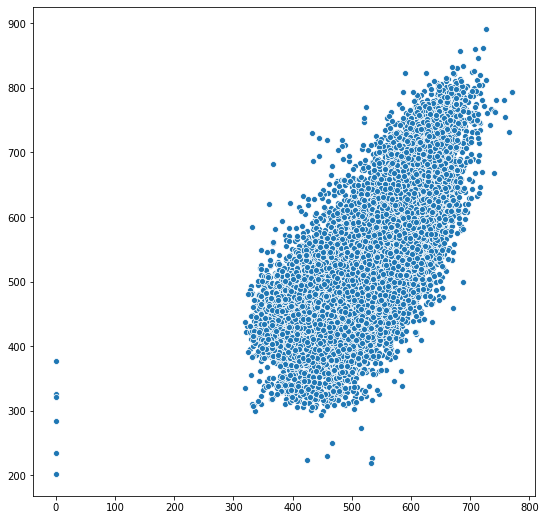

In [81]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=x_teste.mean(axis=1))


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

Cópia das bases de treino e teste.

In [0]:
dtf_des3x = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao', "linguagem_codigo" ]].copy()

In [83]:
dtf_des3x.shape

(97270, 5)

Removendo zeros e dados nulos.

In [84]:
'''

dados_notas.update(dados_notas["ciencias_humanas"].fillna(0) )
dados_notas.update(dados_notas["ciencias_naturais"].fillna(0) )
dados_notas.update(dados_notas["matematica"].fillna(0) )
dados_notas.update(dados_notas["redacao"].fillna(0) )
dados_notas.update(dados_notas["linguagem_codigo"].fillna(0) )

'''

#dtf_des3x = dtf_des3x.drop(dtf_des3x[(dtf_des3x.ciencias_naturais == 0) | (dtf_des3x.ciencias_humanas == 0) | (dtf_des3x.matematica == 0) | (dtf_des3x.redacao == 0) | (dtf_des3x.linguagem_codigo)].index)

dtf_des3x = dtf_des3x.query("ciencias_naturais != 0 & ciencias_humanas != 0 & matematica != 0 & linguagem_codigo != 0 & redacao != 0 ")

dtf_des3x.shape

(95181, 5)

In [0]:
dtf_des3_x  = dtf_des3x[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao' ]]
dtf_des_y   = dtf_des3x[["linguagem_codigo"]]

In [86]:
dtf_des_y.shape

(95181, 1)

In [87]:
dtf_des3_x.shape

(95181, 4)

Gerando bases de teste e treino.

In [0]:
x_des3_treino, x_des3_teste, y_des3_treino, y_des3_teste = train_test_split(dtf_des3_x, dtf_des_y)

In [89]:
print(x_des3_treino.shape)
print(y_des3_treino.shape)
print(x_des3_teste.shape)
print(y_des3_teste.shape)

(71385, 4)
(71385, 1)
(23796, 4)
(23796, 1)


#### LinearSVR

Treinando

In [90]:
modelo_des3 = LinearSVR()
modelo_des3.fit(x_des3_treino, y_des3_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Predição.

In [0]:
predicoes_notas_linguagem_des3 = modelo.predict(x_des3_teste)

Plotando

In [92]:
print("Predição")

predicoes_notas_linguagem_des3[0:5]

Predição


array([526.64112991, 420.36113108, 486.06554237, 503.574443  ,
       440.25347678])

In [93]:
y_des3_teste[0:5]

,linguagem_codigo
57895,563.40
12393,469.60
122140,424.90
118697,557.40
98904,523.00


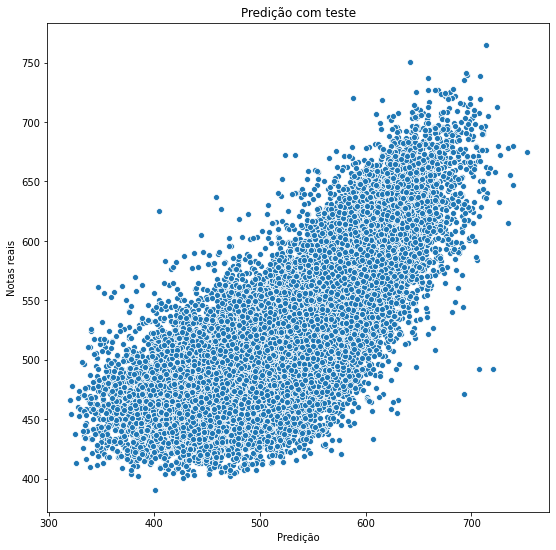

In [94]:
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_des3_teste["linguagem_codigo"].values, y=predicoes_notas_linguagem_des3)
plt.title("Predição com teste")
plt.ylabel("Notas reais")
plt.xlabel("Predição")
plt.show()

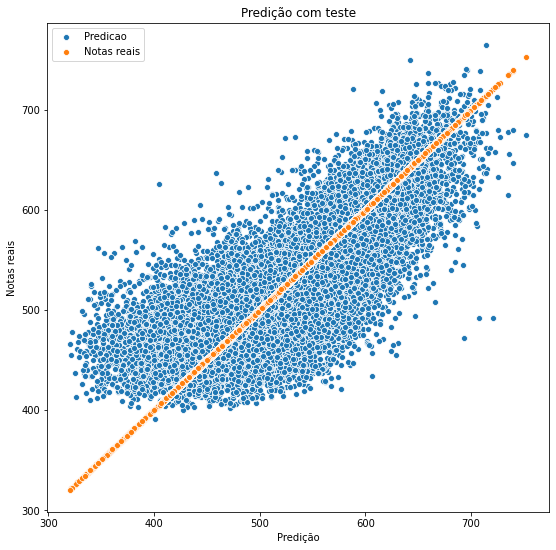

In [95]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_des3_teste["linguagem_codigo"].values, y=predicoes_notas_linguagem_des3, label="Predicao" )
sns.scatterplot(x=y_des3_teste["linguagem_codigo"].values, y=y_des3_teste["linguagem_codigo"].values, label="Notas reais")
plt.title("Predição com teste")
plt.ylabel("Notas reais")
plt.xlabel("Predição")
plt.legend()
plt.show()

mean square root error

In [96]:
mean_squared_error(y_des3_teste["linguagem_codigo"].values, predicoes_notas_linguagem_des3)

2106.95

#### Árvore de Decisão

Treinando

In [97]:
modelo_des3 = DecisionTreeRegressor()
modelo_des3.fit(x_des3_treino, y_des3_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predição

In [0]:
predicoes_notas_linguagem_des3 = modelo.predict(x_des3_teste)

Plotando

In [99]:
predicoes_notas_linguagem_des3[0:5]

array([526.64112991, 420.36113108, 486.06554237, 503.574443  ,
       440.25347678])

In [100]:
y_des3_teste[0:5]

,linguagem_codigo
57895,563.40
12393,469.60
122140,424.90
118697,557.40
98904,523.00


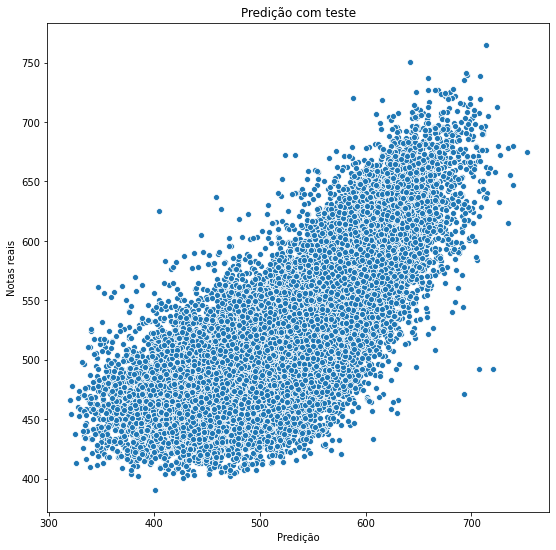

In [101]:
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_des3_teste["linguagem_codigo"].values, y=predicoes_notas_linguagem_des3)
plt.title("Predição com teste")
plt.ylabel("Notas reais")
plt.xlabel("Predição")
plt.show()

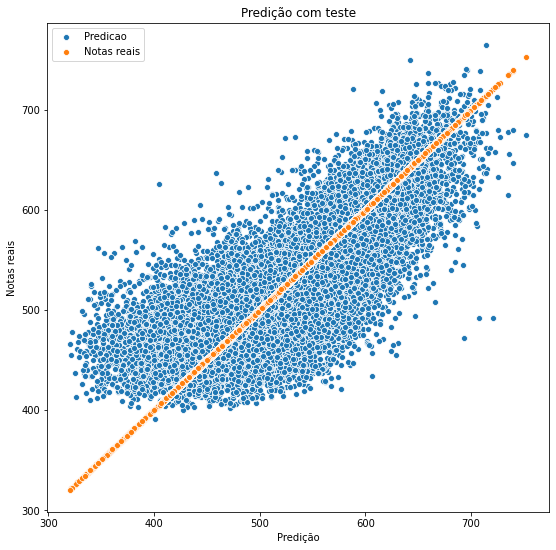

In [102]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_des3_teste["linguagem_codigo"].values, y=predicoes_notas_linguagem_des3, label="Predicao" )
sns.scatterplot(x=y_des3_teste["linguagem_codigo"].values, y=y_des3_teste["linguagem_codigo"].values, label="Notas reais")
plt.title("Predição com teste")
plt.ylabel("Notas reais")
plt.xlabel("Predição")
plt.legend()
plt.show()

mean square root error

In [103]:
mean_squared_error(y_des3_teste["linguagem_codigo"].values, predicoes_notas_linguagem_des3)

2106.95

#### Conclusão

Entre os modelos LinearSRV e árvore de decisão(DecisionTreeRegressor), usando o mesmo conjunto de dados não houve diferença significativa no *mean square root error*. Contudo quando comparando os resultados da base com e sem os zeros houve uma leve diminuição desse índice. 

É bom frisar que essa melhora teve como base a retirada dos valores 0 do conjunto de dados, esse modelo não é recomendado nos casos do estudante não ter preenchido o gabarito de umas das provas.

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

O treinaemto mostrou como é importante fazer um estudos dos dados, como se distribuiem e a relação entre variáveis, para montar modelos os mais confiáveis quanto for possível para que possam ser usados em apliações de interesse. 

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [104]:
flt_pred1 = mean_squared_error(y_teste, predicoes_notas_linguagem)
flt_pred_boba = mean_squared_error(y_teste, dummy_predicoes)
flt_pred_treino = mean_squared_error(y_teste, y_treino)

print(flt_pred1)
print(flt_pred_boba)
print(flt_pred_treino)

ValueError: ignored

In [0]:
flt_pred_treino = mean_squared_error(y_teste, y_treino[0:24318])

print(flt_pred1)
print(flt_pred_boba)
print(flt_pred_treino)

In [0]:
mean_squared_error(x_treino['matematica'], y_treino)